# Analyzing USA House Prices

Dataset: https://www.kaggle.com/datasets/fratzcan/usa-house-prices

## Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
houses = pd.read_csv("USA Housing Dataset.csv")
df = houses.copy()

In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4140 non-null   object 
 17  country        4140 non-null   object 
dtypes: float

In [5]:
df.nunique()

date               68
price            1625
bedrooms            9
bathrooms          24
sqft_living       549
sqft_lot         2856
floors              6
waterfront          2
view                5
condition           5
sqft_above        491
sqft_basement     205
yr_built          115
yr_renovated       60
street           4079
city               43
statezip           77
country             1
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4140.0,553062.877289,583686.452245,0.0,320000.00,460000.00,659125.0,26590000.00
bedrooms,4140.0,3.400483,0.903939,0.0,3.00,3.00,4.0,8.00
bathrooms,4140.0,2.163043,0.784733,0.0,1.75,2.25,2.5,6.75
sqft_living,4140.0,2143.638889,957.481621,370.0,1470.00,1980.00,2620.0,10040.00
sqft_lot,4140.0,14697.638164,35876.838123,638.0,5000.00,7676.00,11000.0,1074218.00
floors,4140.0,1.514130,0.534941,1.0,1.00,1.50,2.0,3.50
waterfront,4140.0,0.007488,0.086219,0.0,0.00,0.00,0.0,1.00
view,4140.0,0.246618,0.790619,0.0,0.00,0.00,0.0,4.00
condition,4140.0,3.452415,0.678533,1.0,3.00,3.00,4.0,5.00
sqft_above,4140.0,1831.351449,861.382947,370.0,1190.00,1600.00,2310.0,8020.00


In [7]:
df["price"].sort_values().head(5)

3945    0.0
3916    0.0
3914    0.0
4098    0.0
3982    0.0
Name: price, dtype: float64

#### Handling Outliers and Feature Engineering

In [8]:
num_numeric_columns = df.select_dtypes(include=["int64", "float64"]).shape[1]
num_numeric_columns

13

In [9]:
# We have 13 numeric columns

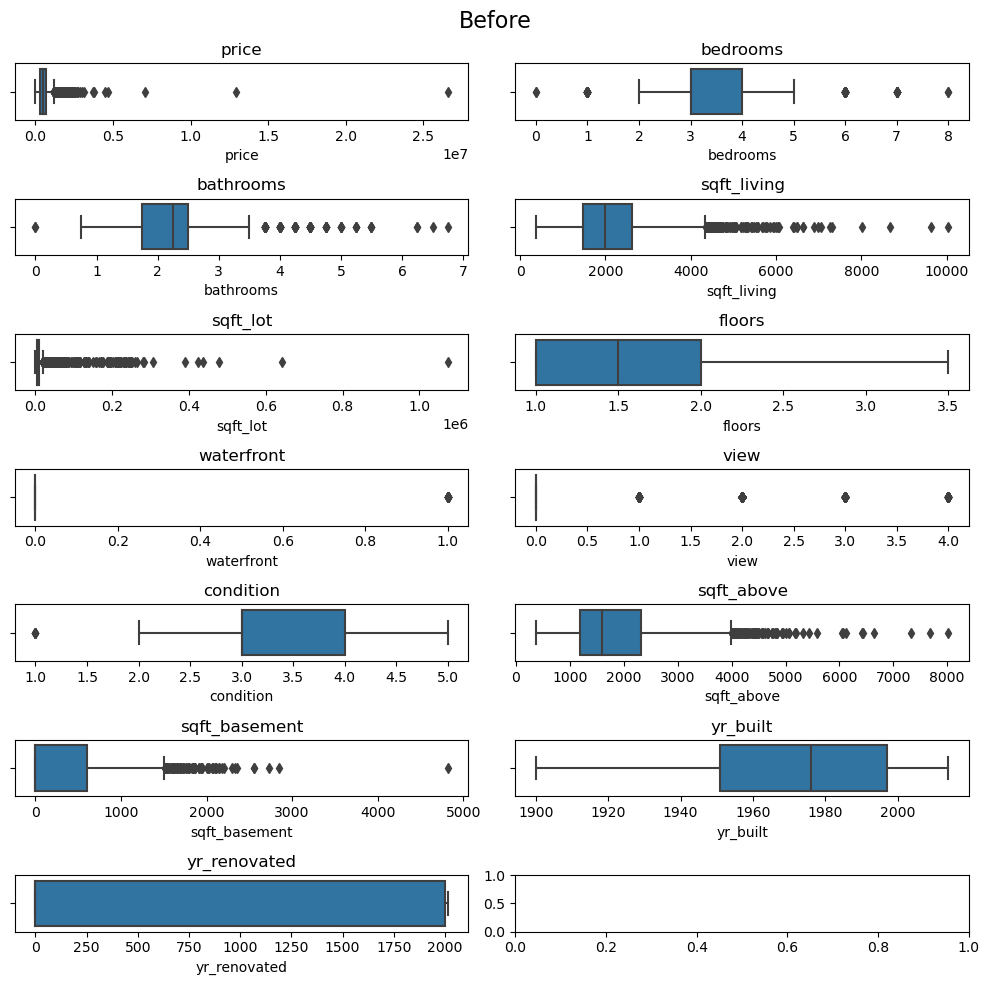

In [10]:
# Let's see the outliers using boxplots

fig, axes = plt.subplots(7, 2, figsize=(10, 10))

for i, column in enumerate(df.select_dtypes(include=["int64", "float64"])):
    sns.boxplot(x=df[column], ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(column)
    
fig.suptitle("Before", fontsize=16)

plt.tight_layout()
plt.show()

In [11]:
# Let's adjust the outliers to the threshold values

for column in df.select_dtypes(include=["int64", "float64"]).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4140.0,517682.984688,265420.188311,0.000,320000.00,460000.00,659125.0,1167812.500
bedrooms,4140.0,3.393720,0.855215,1.500,3.00,3.00,4.0,5.500
bathrooms,4140.0,2.142271,0.726022,0.625,1.75,2.25,2.5,3.625
sqft_living,4140.0,2119.095894,869.785608,370.000,1470.00,1980.00,2620.0,4345.000
sqft_lot,4140.0,8919.103623,5376.994415,638.000,5000.00,7676.00,11000.0,20000.000
floors,4140.0,1.514130,0.534941,1.000,1.00,1.50,2.0,3.500
waterfront,4140.0,0.000000,0.000000,0.000,0.00,0.00,0.0,0.000
view,4140.0,0.000000,0.000000,0.000,0.00,0.00,0.0,0.000
condition,4140.0,3.453019,0.676570,1.500,3.00,3.00,4.0,5.000
sqft_above,4140.0,1815.431401,805.113573,370.000,1190.00,1600.00,2310.0,3990.000


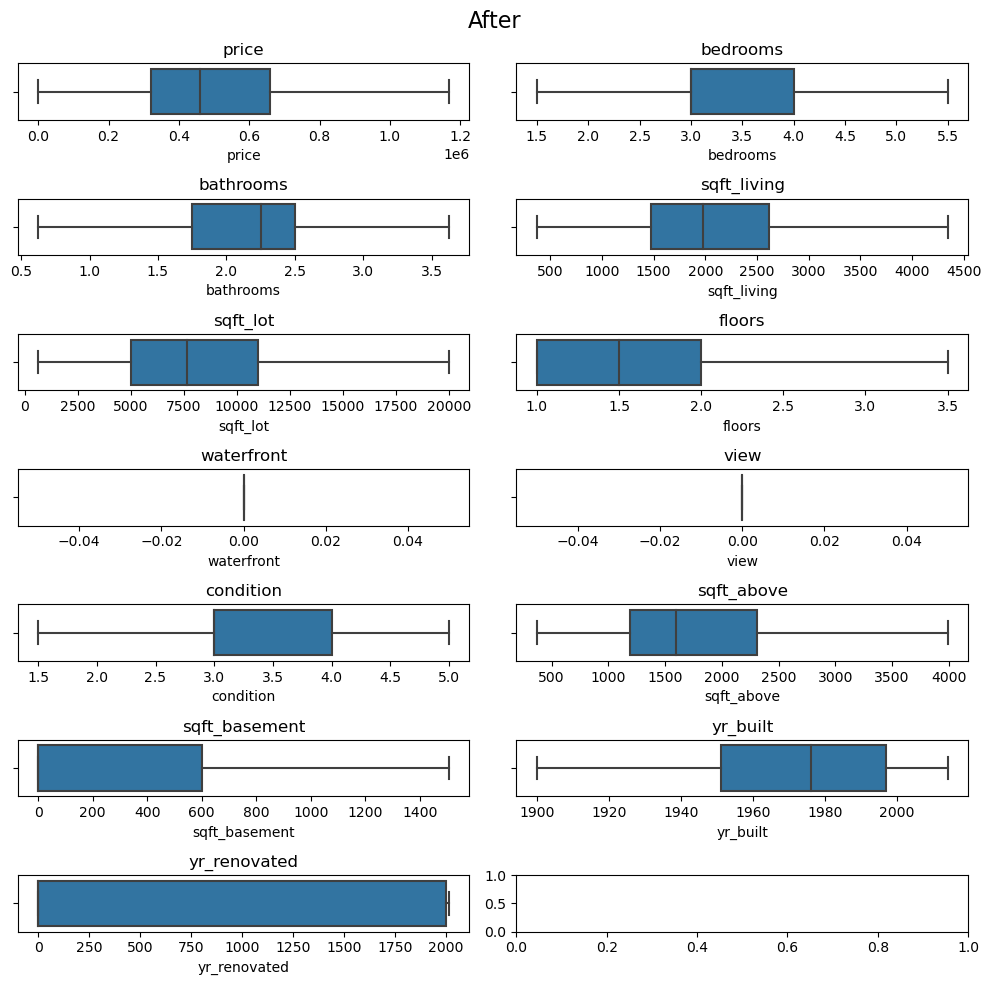

In [13]:
# Let's check

fig, axes = plt.subplots(7, 2, figsize=(10, 10))

for i, column in enumerate(df.select_dtypes(include=["int64", "float64"])):
    sns.boxplot(x=df[column], ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(column)
    
fig.suptitle("After", fontsize=16)

plt.tight_layout()
plt.show()

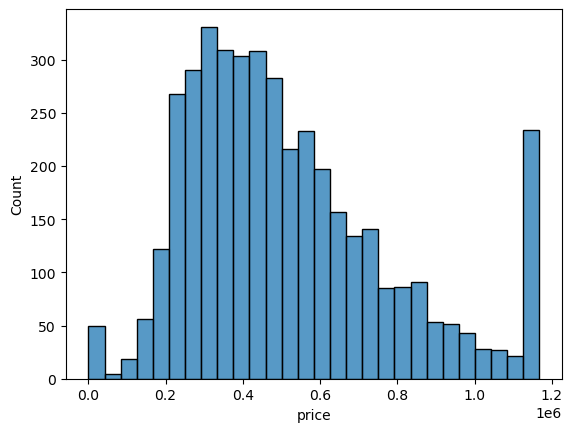

In [14]:
# A house price can't be 0, let's analyze prices

sns.histplot(data=df, x="price")
plt.show()

In [15]:
price_zero = df[df["price"] == 0]
price_zero.shape[0]

49

In [16]:
# Since we have only 49 observations with a price value of 0, we can remove them.

df = df[df["price"] > 0]

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4091.0,523883.538648,260849.977101,7800.000,325093.75,464600.00,660000.0,1167812.500
bedrooms,4091.0,3.386825,0.850442,1.500,3.00,3.00,4.0,5.500
bathrooms,4091.0,2.137650,0.722425,0.625,1.75,2.25,2.5,3.625
sqft_living,4091.0,2112.516989,865.244461,370.000,1460.00,1980.00,2610.0,4345.000
sqft_lot,4091.0,8895.385480,5373.384359,638.000,5000.00,7665.00,10952.5,20000.000
floors,4091.0,1.514300,0.535172,1.000,1.00,1.50,2.0,3.500
waterfront,4091.0,0.000000,0.000000,0.000,0.00,0.00,0.0,0.000
view,4091.0,0.000000,0.000000,0.000,0.00,0.00,0.0,0.000
condition,4091.0,3.450379,0.674261,1.500,3.00,3.00,4.0,5.000
sqft_above,4091.0,1810.864336,800.872222,370.000,1190.00,1600.00,2303.0,3990.000


In [18]:
df.nunique()

date               68
price            1467
bedrooms            6
bathrooms          14
sqft_living       461
sqft_lot         2383
floors              6
waterfront          1
view                1
condition           5
sqft_above        421
sqft_basement     157
yr_built          115
yr_renovated       59
street           4030
city               43
statezip           77
country             1
dtype: int64

In [19]:
# Since we only have one country (USA), we can remove this feature.

df = df.drop(columns=["country"])

In [20]:
# We should remove the "waterfront" and "view" features since all their values are 0.

df = df.drop(columns=["waterfront", "view"])

In [21]:
# We can extract the states from the "statezip" feature.

df[["state", "zip"]] = df["statezip"].str.extract(r'([A-Z]{2})\s*(\d{5})')

In [22]:
df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,state,zip
0,2014-05-09 00:00:00,376000.0,3.0,2.000,1340.0,1384.0,3.0,3.0,1340.0,0.0,2008.0,0.0,9245-9249 Fremont Ave N,Seattle,WA 98103,WA,98103
1,2014-05-09 00:00:00,800000.0,4.0,3.250,3540.0,20000.0,2.0,3.0,3540.0,0.0,2007.0,0.0,33001 NE 24th St,Carnation,WA 98014,WA,98014
2,2014-05-09 00:00:00,1167812.5,5.0,3.625,4345.0,20000.0,2.0,3.0,3990.0,850.0,2010.0,0.0,7070 270th Pl SE,Issaquah,WA 98029,WA,98029
3,2014-05-09 00:00:00,324000.0,3.0,2.250,998.0,904.0,2.0,3.0,798.0,200.0,2007.0,0.0,820 NW 95th St,Seattle,WA 98117,WA,98117
4,2014-05-10 00:00:00,549900.0,5.0,2.750,3060.0,7015.0,1.0,5.0,1600.0,1460.0,1979.0,0.0,10834 31st Ave SW,Seattle,WA 98146,WA,98146


In [23]:
df["state"].nunique()

1

In [24]:
# We can also remove these features since there was only one state (WA) 

df = df.drop(columns=["street", "statezip", "state", "zip"])

In [25]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,2014-05-09 00:00:00,376000.0,3.0,2.000,1340.0,1384.0,3.0,3.0,1340.0,0.0,2008.0,0.0,Seattle
1,2014-05-09 00:00:00,800000.0,4.0,3.250,3540.0,20000.0,2.0,3.0,3540.0,0.0,2007.0,0.0,Carnation
2,2014-05-09 00:00:00,1167812.5,5.0,3.625,4345.0,20000.0,2.0,3.0,3990.0,850.0,2010.0,0.0,Issaquah
3,2014-05-09 00:00:00,324000.0,3.0,2.250,998.0,904.0,2.0,3.0,798.0,200.0,2007.0,0.0,Seattle
4,2014-05-10 00:00:00,549900.0,5.0,2.750,3060.0,7015.0,1.0,5.0,1600.0,1460.0,1979.0,0.0,Seattle


In [26]:
# We can extract years and months from "date" feature.

df["date"] = pd.to_datetime(df["date"])

df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month

In [27]:
df.nunique()

date               68
price            1467
bedrooms            6
bathrooms          14
sqft_living       461
sqft_lot         2383
floors              6
condition           5
sqft_above        421
sqft_basement     157
yr_built          115
yr_renovated       59
city               43
year                1
month               3
dtype: int64

In [28]:
# We can remove the "year" feature since we have only one year (2014)

df = df.drop(columns=["year"])

In [29]:
# We can also remove the "date" feature

df = df.drop(columns=["date"])

In [30]:
df.nunique()

price            1467
bedrooms            6
bathrooms          14
sqft_living       461
sqft_lot         2383
floors              6
condition           5
sqft_above        421
sqft_basement     157
yr_built          115
yr_renovated       59
city               43
month               3
dtype: int64

In [31]:
df["month"] = df["month"].astype("int64")

In [32]:
df.dtypes

price            float64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
condition        float64
sqft_above       float64
sqft_basement    float64
yr_built         float64
yr_renovated     float64
city              object
month              int64
dtype: object

In [33]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,month
0,376000.0,3.0,2.000,1340.0,1384.0,3.0,3.0,1340.0,0.0,2008.0,0.0,Seattle,5
1,800000.0,4.0,3.250,3540.0,20000.0,2.0,3.0,3540.0,0.0,2007.0,0.0,Carnation,5
2,1167812.5,5.0,3.625,4345.0,20000.0,2.0,3.0,3990.0,850.0,2010.0,0.0,Issaquah,5
3,324000.0,3.0,2.250,998.0,904.0,2.0,3.0,798.0,200.0,2007.0,0.0,Seattle,5
4,549900.0,5.0,2.750,3060.0,7015.0,1.0,5.0,1600.0,1460.0,1979.0,0.0,Seattle,5


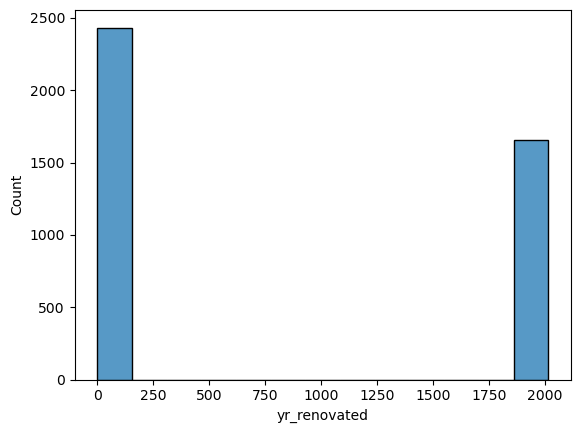

In [34]:
sns.histplot(data=df, x="yr_renovated")
plt.show()

In [35]:
yr_renovated_values = df["yr_renovated"].unique()
print(sorted(yr_renovated_values))

[0.0, 1912.0, 1913.0, 1923.0, 1934.0, 1945.0, 1948.0, 1953.0, 1954.0, 1955.0, 1956.0, 1958.0, 1960.0, 1963.0, 1966.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0, 1974.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0]


In [36]:
df["yr_renovated"].value_counts()

yr_renovated
0.0       2433
2000.0     152
2003.0     136
2009.0      99
2001.0      94
2005.0      79
2004.0      68
2014.0      65
2006.0      60
1994.0      54
2013.0      53
1989.0      50
1923.0      50
2011.0      47
2012.0      43
2008.0      41
1988.0      39
1993.0      38
1983.0      37
1998.0      37
2002.0      37
1999.0      36
1912.0      28
1979.0      28
1985.0      27
2010.0      26
1992.0      25
1997.0      23
1982.0      20
1996.0      17
1972.0      15
1956.0      14
1990.0      13
1963.0      12
1969.0       9
1968.0       9
1970.0       8
1984.0       8
2007.0       7
1954.0       7
1934.0       6
1974.0       6
1945.0       6
1986.0       4
1958.0       4
1971.0       3
1978.0       3
1995.0       2
1955.0       2
1980.0       2
1913.0       1
1991.0       1
1948.0       1
1981.0       1
1960.0       1
1987.0       1
1966.0       1
1953.0       1
1977.0       1
Name: count, dtype: int64

In [37]:
# We have interesting "yr_renovated" values, let's handle them.

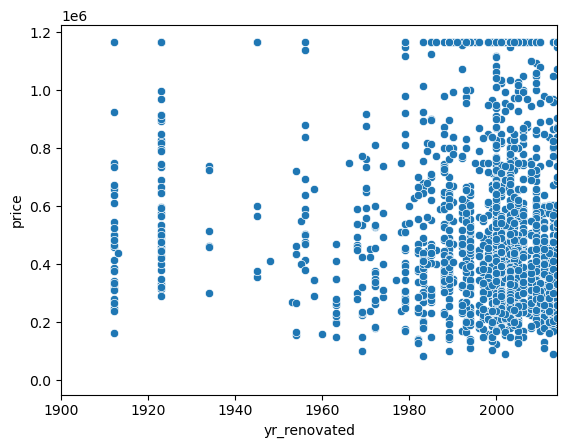

In [38]:
sns.scatterplot(data=df, x="yr_renovated", y="price")
plt.xlim(1900, 2014)
plt.show()

In [39]:
df_non_zero = df[df["yr_renovated"] != 0]
corr_non_zero = df_non_zero["yr_renovated"].corr(df_non_zero["price"])

corr_non_zero

-0.04608503068216803

In [40]:
# The values of "yr_renovated" between 1900 and 2014 do not seem to have a relationship with "price".

In [41]:
df["renovated"] = df["yr_renovated"].apply(lambda x: 0 if x==0 else 1)

In [42]:
df["renovated"].value_counts()

renovated
0    2433
1    1658
Name: count, dtype: int64

In [43]:
df = df.drop(columns=["yr_renovated"])

In [44]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,city,month,renovated
0,376000.0,3.0,2.000,1340.0,1384.0,3.0,3.0,1340.0,0.0,2008.0,Seattle,5,0
1,800000.0,4.0,3.250,3540.0,20000.0,2.0,3.0,3540.0,0.0,2007.0,Carnation,5,0
2,1167812.5,5.0,3.625,4345.0,20000.0,2.0,3.0,3990.0,850.0,2010.0,Issaquah,5,0
3,324000.0,3.0,2.250,998.0,904.0,2.0,3.0,798.0,200.0,2007.0,Seattle,5,0
4,549900.0,5.0,2.750,3060.0,7015.0,1.0,5.0,1600.0,1460.0,1979.0,Seattle,5,0


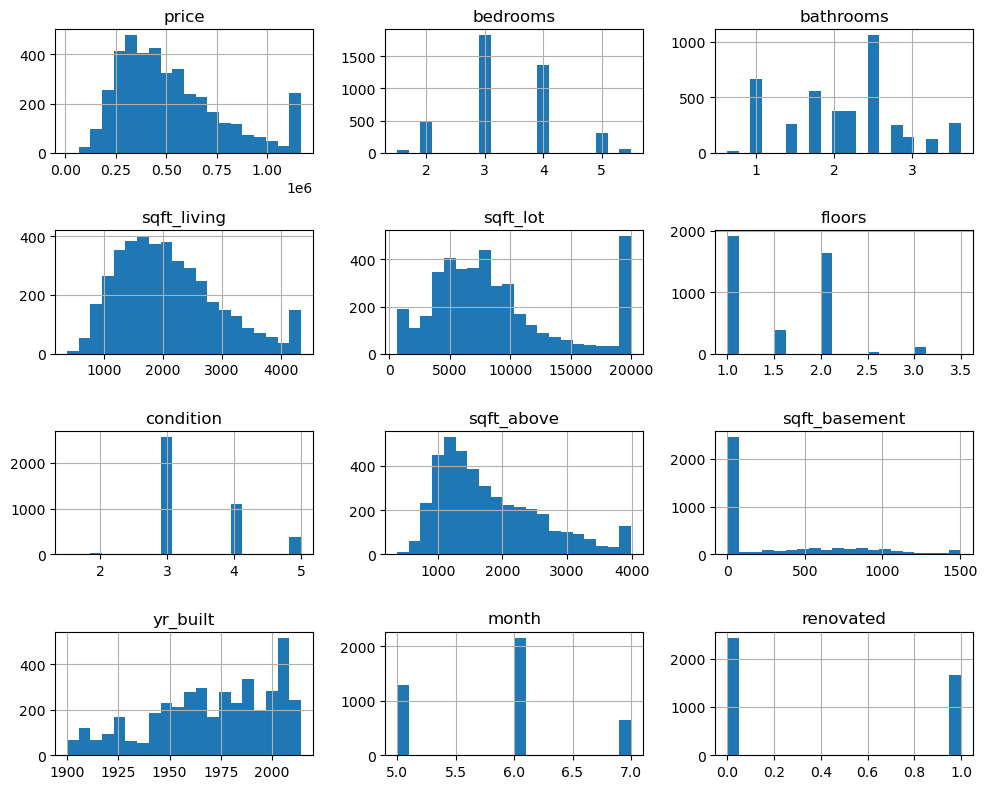

In [45]:
# Let's analyze histograms of all numerical features

df.hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()

In [46]:
# We can also handle the "sqft_basement" feature.

In [47]:
df["has_basement"] = df["sqft_basement"].apply(lambda x: 1 if x > 0 else 0)

In [48]:
df["has_basement"].value_counts()

has_basement
0    2449
1    1642
Name: count, dtype: int64

In [49]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,city,month,renovated,has_basement
0,376000.0,3.0,2.000,1340.0,1384.0,3.0,3.0,1340.0,0.0,2008.0,Seattle,5,0,0
1,800000.0,4.0,3.250,3540.0,20000.0,2.0,3.0,3540.0,0.0,2007.0,Carnation,5,0,0
2,1167812.5,5.0,3.625,4345.0,20000.0,2.0,3.0,3990.0,850.0,2010.0,Issaquah,5,0,1
3,324000.0,3.0,2.250,998.0,904.0,2.0,3.0,798.0,200.0,2007.0,Seattle,5,0,1
4,549900.0,5.0,2.750,3060.0,7015.0,1.0,5.0,1600.0,1460.0,1979.0,Seattle,5,0,1


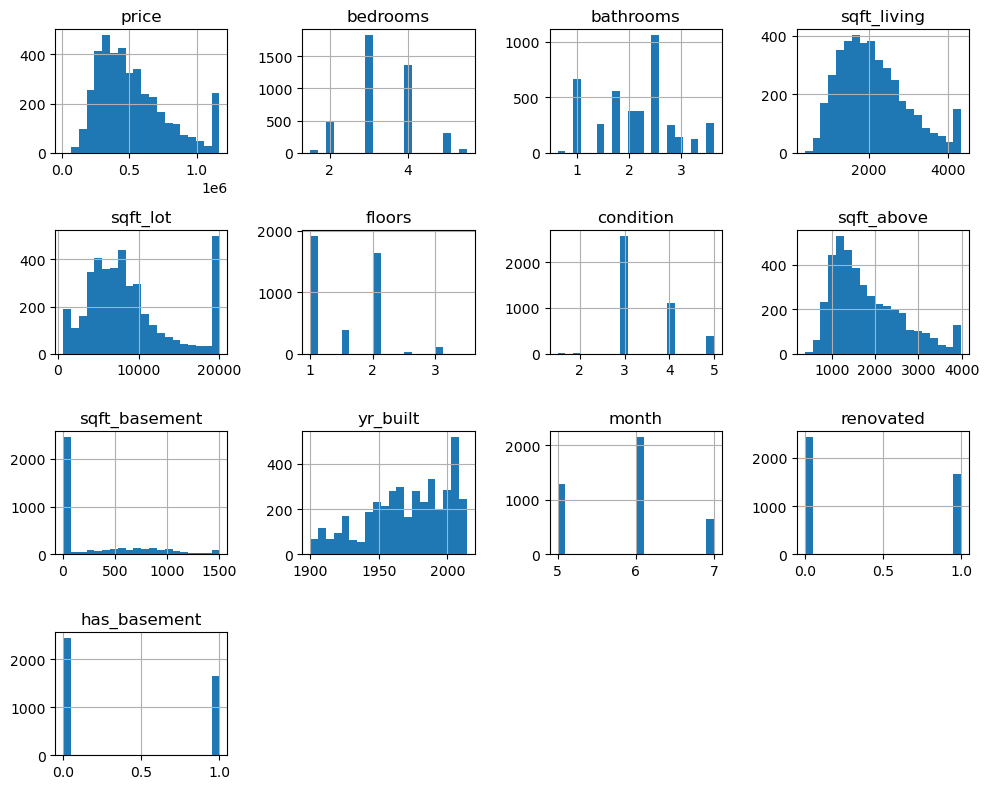

In [50]:
# Let's check again

df.hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()

In [51]:
df["bathrooms"].value_counts()

bathrooms
2.500    1060
1.000     668
1.750     554
2.000     374
2.250     373
1.500     258
2.750     247
3.500     153
3.000     143
3.250     125
3.625     115
0.750      17
1.250       2
0.625       2
Name: count, dtype: int64

## Analyzing Relationships

In [52]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'city', 'month',
       'renovated', 'has_basement'],
      dtype='object')

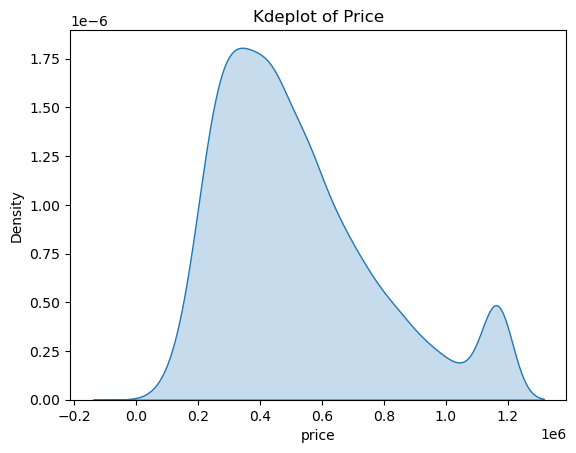

In [53]:
sns.kdeplot(df, x="price", fill=True)
plt.title("Kdeplot of Price")
plt.show()

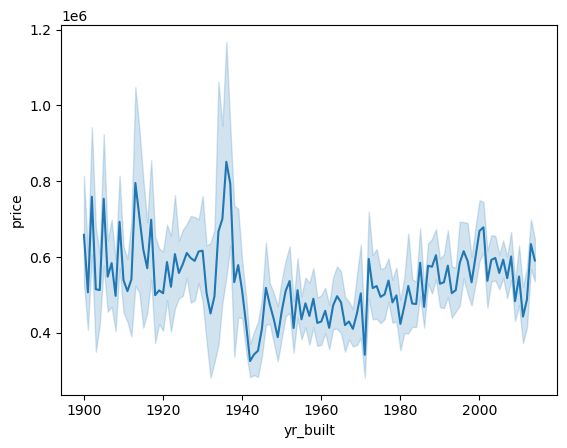

In [54]:
sns.lineplot(data=df, x="yr_built", y="price")
plt.show()

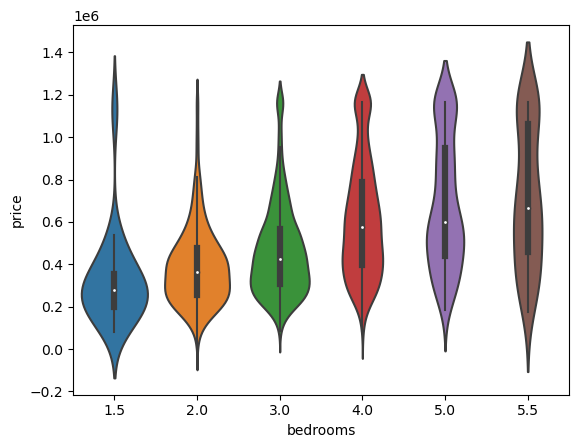

In [55]:
sns.violinplot(data=df, x="bedrooms", y="price")
plt.show()

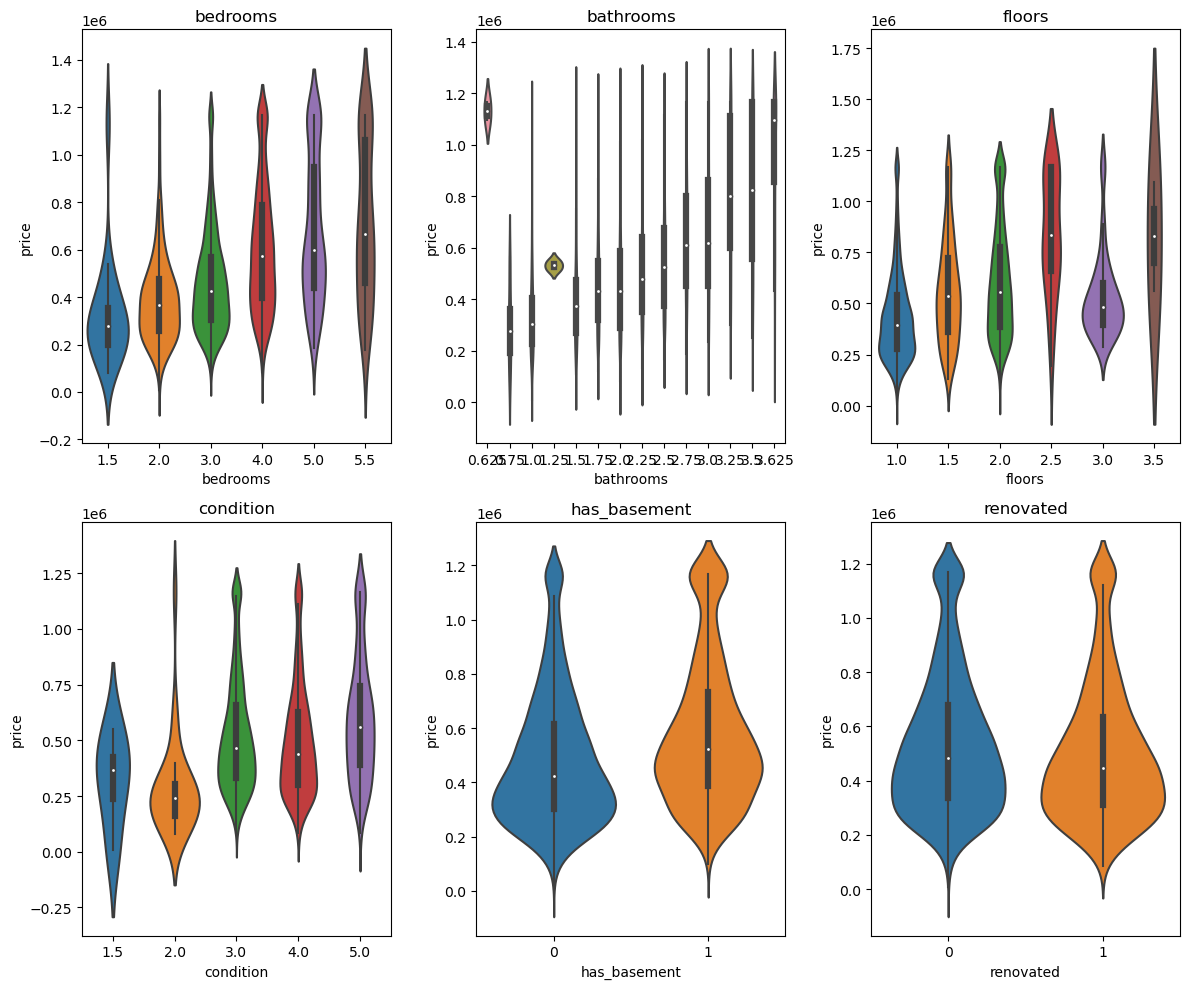

In [56]:
columns = ["bedrooms", "bathrooms", "floors", "condition", "has_basement", "renovated"]

fig, axes = plt.subplots(2, 3, figsize=(12, 10))

for i, column in enumerate(columns):
        sns.violinplot(data=df, x=column, y=df["price"], ax=axes[i // 3, i % 3])
        axes[i // 3, i % 3].set_title(column)
        
plt.tight_layout()
plt.show()

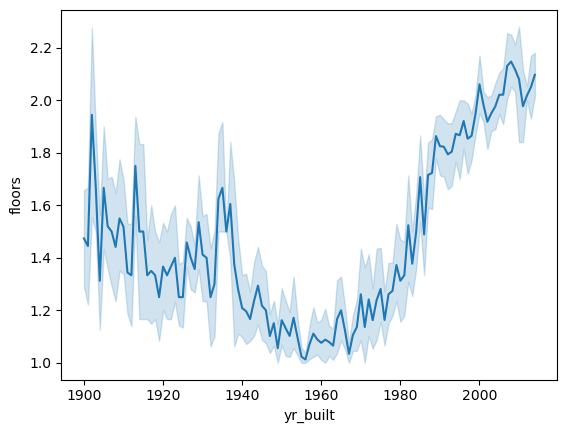

In [57]:
sns.lineplot(data=df, x="yr_built", y="floors")
plt.show()

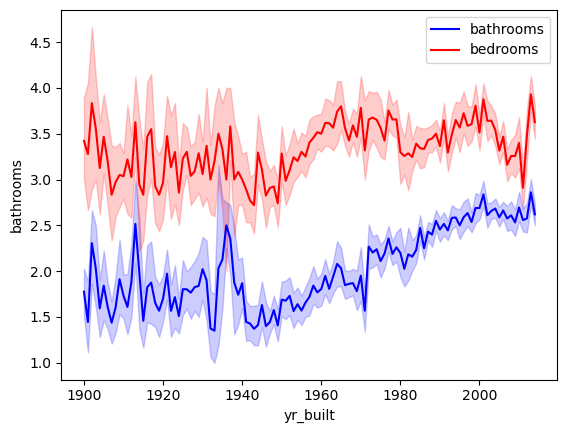

In [58]:
sns.lineplot(data=df, x="yr_built", y="bathrooms", label="bathrooms", color="blue")
sns.lineplot(data=df, x="yr_built", y="bedrooms", label="bedrooms", color="red")

plt.legend()
plt.show()

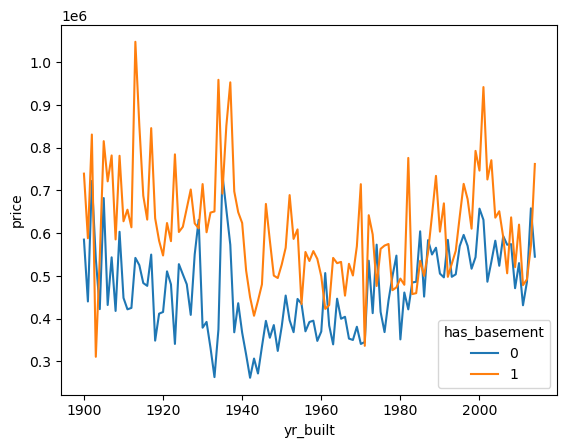

In [59]:
sns.lineplot(data=df, x="yr_built", y="price", hue="has_basement", ci=None)
plt.show()

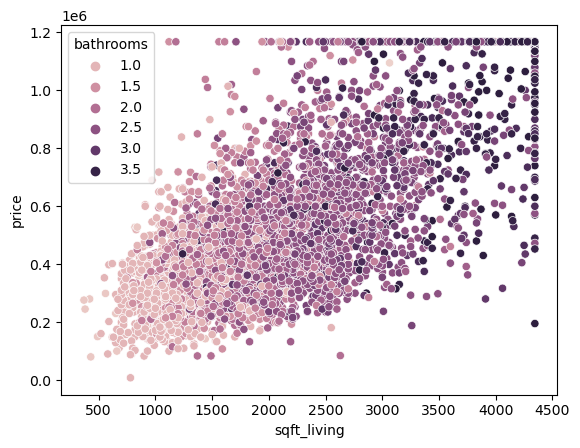

In [60]:
sns.scatterplot(data=df, x="sqft_living", y="price", hue="bathrooms")
plt.show()

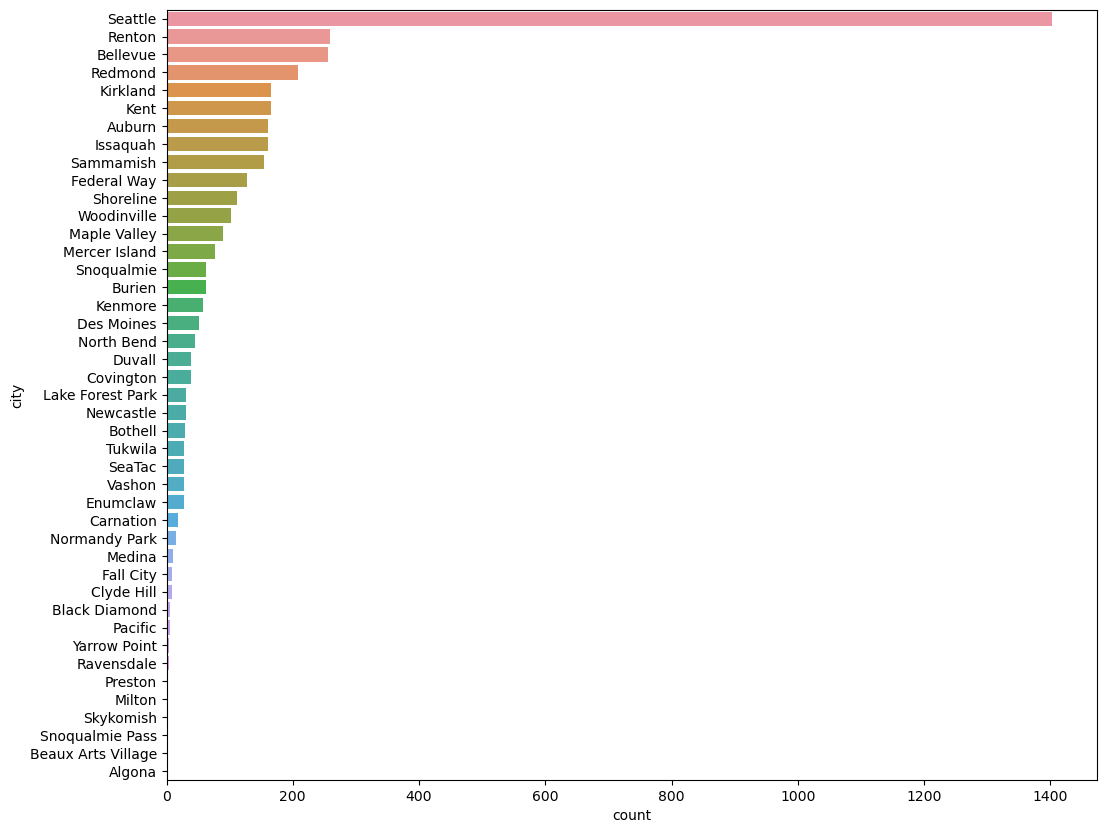

In [61]:
plt.figure(figsize=(12, 10))
sns.countplot(y='city', data=df, order=df['city'].value_counts().index)
plt.show()

## Dummy

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4091 entries, 0 to 4139
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4091 non-null   float64
 1   bedrooms       4091 non-null   float64
 2   bathrooms      4091 non-null   float64
 3   sqft_living    4091 non-null   float64
 4   sqft_lot       4091 non-null   float64
 5   floors         4091 non-null   float64
 6   condition      4091 non-null   float64
 7   sqft_above     4091 non-null   float64
 8   sqft_basement  4091 non-null   float64
 9   yr_built       4091 non-null   float64
 10  city           4091 non-null   object 
 11  month          4091 non-null   int64  
 12  renovated      4091 non-null   int64  
 13  has_basement   4091 non-null   int64  
dtypes: float64(10), int64(3), object(1)
memory usage: 479.4+ KB


In [63]:
top_cities = df["city"].value_counts().nlargest(10).index

df["city"] = df["city"].apply(lambda x: x if x in top_cities else "Other")

df = pd.get_dummies(df, columns=["city"])

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4091 entries, 0 to 4139
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             4091 non-null   float64
 1   bedrooms          4091 non-null   float64
 2   bathrooms         4091 non-null   float64
 3   sqft_living       4091 non-null   float64
 4   sqft_lot          4091 non-null   float64
 5   floors            4091 non-null   float64
 6   condition         4091 non-null   float64
 7   sqft_above        4091 non-null   float64
 8   sqft_basement     4091 non-null   float64
 9   yr_built          4091 non-null   float64
 10  month             4091 non-null   int64  
 11  renovated         4091 non-null   int64  
 12  has_basement      4091 non-null   int64  
 13  city_Auburn       4091 non-null   bool   
 14  city_Bellevue     4091 non-null   bool   
 15  city_Federal Way  4091 non-null   bool   
 16  city_Issaquah     4091 non-null   bool   
 17  

In [65]:
df = df.apply(lambda x: x.astype("int64") if x.dtype=="bool" else x)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4091 entries, 0 to 4139
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             4091 non-null   float64
 1   bedrooms          4091 non-null   float64
 2   bathrooms         4091 non-null   float64
 3   sqft_living       4091 non-null   float64
 4   sqft_lot          4091 non-null   float64
 5   floors            4091 non-null   float64
 6   condition         4091 non-null   float64
 7   sqft_above        4091 non-null   float64
 8   sqft_basement     4091 non-null   float64
 9   yr_built          4091 non-null   float64
 10  month             4091 non-null   int64  
 11  renovated         4091 non-null   int64  
 12  has_basement      4091 non-null   int64  
 13  city_Auburn       4091 non-null   int64  
 14  city_Bellevue     4091 non-null   int64  
 15  city_Federal Way  4091 non-null   int64  
 16  city_Issaquah     4091 non-null   int64  
 17  

## Modeling

In [67]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [68]:
y = df["price"]
X = df.drop(columns=["price"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [69]:
# Correlation

corr_matrix = df.corr()
corr_price = corr_matrix["price"].sort_values(ascending=False)
corr_price

price               1.000000
sqft_living         0.699130
sqft_above          0.602465
bathrooms           0.536263
bedrooms            0.360221
sqft_basement       0.296762
floors              0.294757
city_Bellevue       0.250589
has_basement        0.188246
sqft_lot            0.175660
city_Sammamish      0.124573
city_Redmond        0.118809
city_Kirkland       0.079137
city_Seattle        0.072947
condition           0.054847
city_Issaquah       0.051147
yr_built            0.049306
month               0.037931
renovated          -0.063143
city_Other         -0.088633
city_Renton        -0.149348
city_Federal Way   -0.158018
city_Kent          -0.173808
city_Auburn        -0.174905
Name: price, dtype: float64

### Linear Regression

In [70]:
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression

In [71]:
X = sm.add_constant(X_train)

linear_model = sm.OLS(y_train, X_train).fit()

y_pred_linear = linear_model.predict(X_test)
r2_linear = r2_score(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))

In [72]:
r2_linear

0.6539658646548392

In [73]:
rmse_linear

148715.91359653205

### Random Forests

In [74]:
from sklearn.ensemble import RandomForestRegressor

In [75]:
rf_model = RandomForestRegressor(n_estimators=100)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

In [76]:
r2_rf

0.6599992496496326

In [77]:
rmse_rf

147413.72133076406

### Comparison

In [78]:
comparison_df = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forests"],
    "R2 Score": [r2_linear, r2_rf],
    "RMSE": [rmse_linear, rmse_rf]
})

In [79]:
comparison_df

,Model,R2 Score,RMSE
0,Linear Regression,0.653966,148715.913597
1,Random Forests,0.659999,147413.721331


### Overfitting Check

#### Overfitting Check on Linear Regression Model

In [80]:
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"\nTrain r2: {train_r2}")
print(f"Test r2: {test_r2}")
print(f"Train rmse: {train_rmse}")
print(f"Test rmse: {test_rmse}")


Train r2: 0.6894381586932745
Test r2: 0.6539658646548392
Train rmse: 146801.20787050057
Test rmse: 148715.91359653205


In [81]:
# It seems that our linear model does not have an overfitting issue.

#### Overfitting Check on Random Forests Model

In [82]:
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"\nTrain r2: {train_r2}")
print(f"Test r2: {test_r2}")
print(f"Train rmse: {train_rmse}")
print(f"Test rmse: {test_rmse}")


Train r2: 0.9554624383468892
Test r2: 0.6599992496496326
Train rmse: 55592.83230481205
Test rmse: 147413.72133076406


In [83]:
# There is an overfitting issue with our random forest model, let's try to fix it.

In [84]:
rf_model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)

# K-fold cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')

print(f"Cross-validation R2 scores: {cv_scores}")
print(f"Mean cross-validation R2 score: {cv_scores.mean()}")

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"Test r2: {r2_rf}")
print(f"Test rmse: {rmse_rf}")

Cross-validation R2 scores: [0.6963156  0.66143034 0.71027545 0.66231658 0.64697786]
Mean cross-validation R2 score: 0.6754631660503077
Test r2: 0.6421100618623348
Test rmse: 151242.10604735525


In [85]:
# Let's check again

y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"\nTrain r2: {train_r2}")
print(f"Test r2: {test_r2}")
print(f"Train rmse: {train_rmse}")
print(f"Test rmse: {test_rmse}")


Train r2: 0.8588188024328245
Test r2: 0.6421100618623348
Train rmse: 98979.21684077354
Test rmse: 151242.10604735525


In [86]:
# The Overfitting has decreased.

### Residual Analysis on Random Forest Model

In [87]:
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

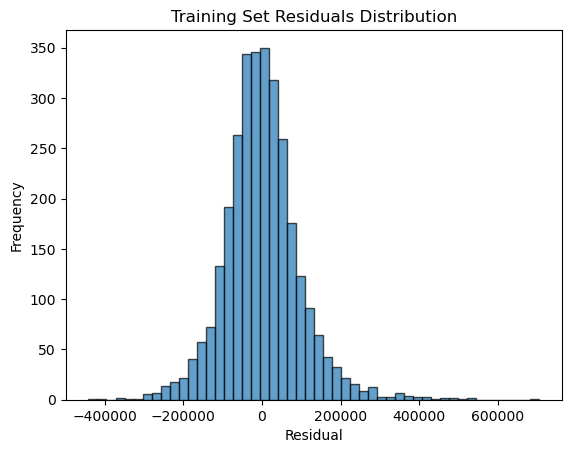

In [88]:
# Train set histogram

plt.hist(residuals_train, bins=50, edgecolor="k", alpha=0.7)
plt.title("Training Set Residuals Distribution")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

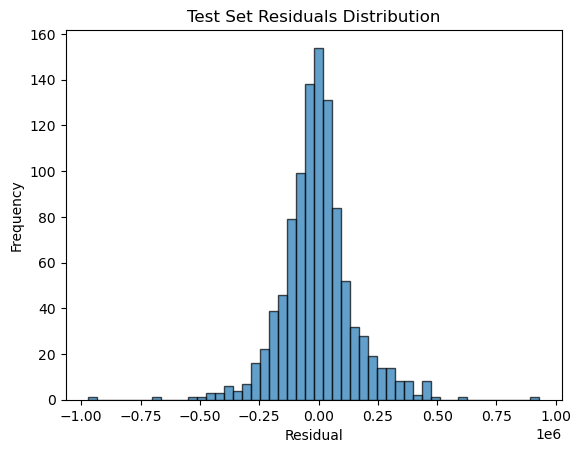

In [89]:
# Test set histogram

plt.hist(residuals_test, bins=50, edgecolor="k", alpha=0.7)
plt.title("Test Set Residuals Distribution")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

### Feature Importance Analysis on Random Forest Model

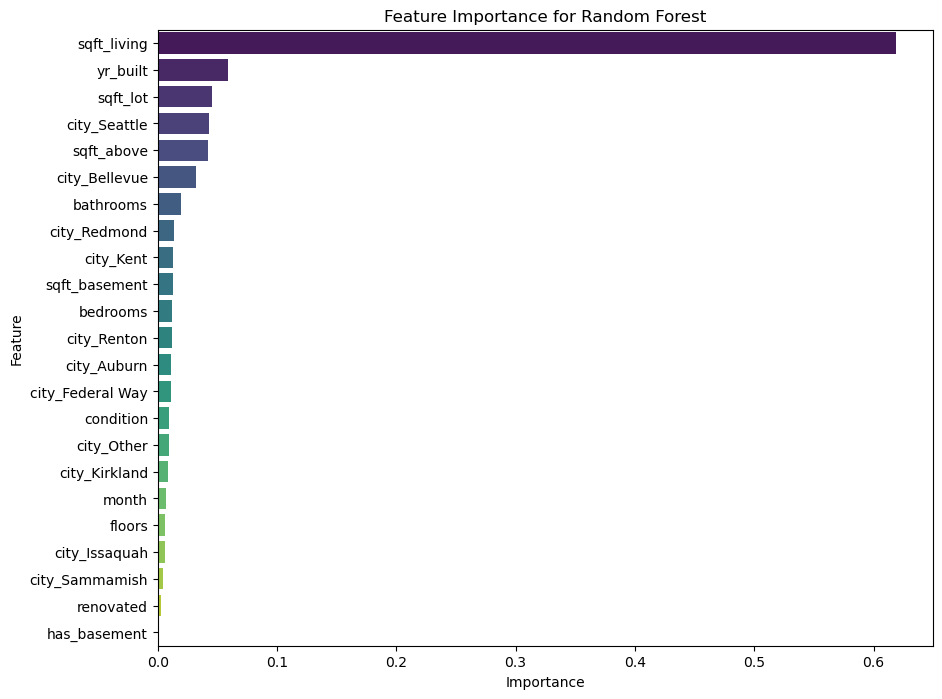

In [90]:
importances = rf_model.feature_importances_

features = X_train.columns

feature_importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
})

feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance_df, x="Importance", y="Feature", palette="viridis")
plt.title("Feature Importance for Random Forest")
plt.show()

### Visualizing Actual vs. Predicted Values

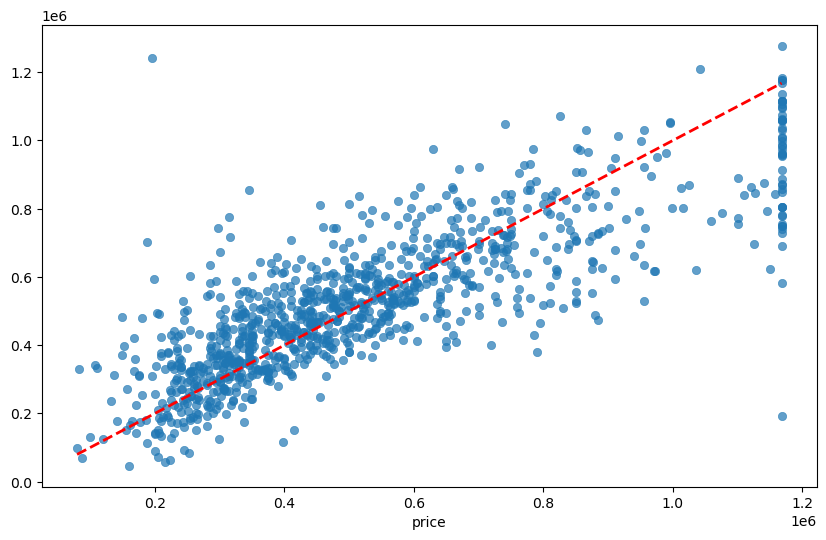

In [91]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_linear, alpha=0.7, edgecolor=None)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)

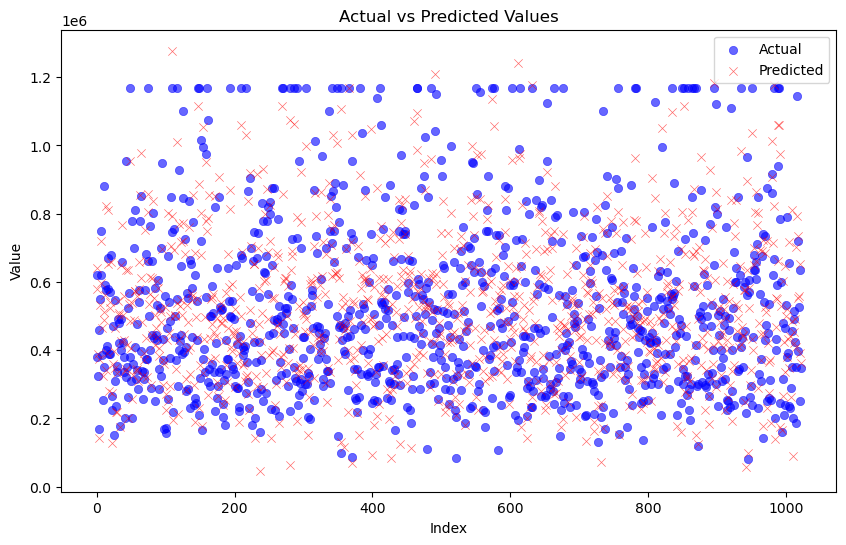

In [92]:
df_plot = pd.DataFrame({
    'Index': range(len(y_test)),
    'Actual': y_test,
    'Predicted': y_pred_linear
})

plt.figure(figsize=(10, 6))

sns.scatterplot(data=df_plot, x='Index', y='Actual', color='blue', label='Actual', alpha=0.6, edgecolor=None, marker='o')
sns.scatterplot(data=df_plot, x='Index', y='Predicted', color='red', label='Predicted', alpha=0.6, edgecolor=None, marker='x')

plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()

plt.show()

### Prediction

In [93]:
df.dtypes

price               float64
bedrooms            float64
bathrooms           float64
sqft_living         float64
sqft_lot            float64
floors              float64
condition           float64
sqft_above          float64
sqft_basement       float64
yr_built            float64
month                 int64
renovated             int64
has_basement          int64
city_Auburn           int64
city_Bellevue         int64
city_Federal Way      int64
city_Issaquah         int64
city_Kent             int64
city_Kirkland         int64
city_Other            int64
city_Redmond          int64
city_Renton           int64
city_Sammamish        int64
city_Seattle          int64
dtype: object

In [94]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,...,city_Bellevue,city_Federal Way,city_Issaquah,city_Kent,city_Kirkland,city_Other,city_Redmond,city_Renton,city_Sammamish,city_Seattle
count,4.091000e+03,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,...,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000
mean,5.238835e+05,3.386825,2.137650,2112.516989,8895.385480,1.514300,3.450379,1810.864336,303.273955,1970.824737,...,0.062332,0.031288,0.039355,0.040577,0.040577,0.251528,0.051088,0.063310,0.037644,0.342948
std,2.608500e+05,0.850442,0.722425,865.244461,5373.384359,0.535172,0.674261,800.872222,436.618649,29.840158,...,0.241787,0.174117,0.194461,0.197332,0.197332,0.433944,0.220204,0.243549,0.190356,0.474752
min,7.800000e+03,1.500000,0.625000,370.000000,638.000000,1.000000,1.500000,370.000000,0.000000,1900.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.250938e+05,3.000000,1.750000,1460.000000,5000.000000,1.000000,3.000000,1190.000000,0.000000,1951.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.646000e+05,3.000000,2.250000,1980.000000,7665.000000,1.500000,3.000000,1600.000000,0.000000,1976.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.600000e+05,4.000000,2.500000,2610.000000,10952.500000,2.000000,4.000000,2303.000000,600.000000,1997.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.167812e+06,5.500000,3.625000,4345.000000,20000.000000,3.500000,5.000000,3990.000000,1506.250000,2014.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [95]:
data = {
    'bedrooms': [3],
    'bathrooms': [2.5],
    'sqft_living': [1800],
    'sqft_lot': [5000],
    'floors': [2],
    'condition': [4],
    'sqft_above': [1500],
    'sqft_basement': [300],
    'yr_built': [2005],
    'month': [3],
    'renovated': [0],
    'has_basement': [1],
    'city_Auburn': [0],
    'city_Bellevue': [0],
    'city_Federal Way': [0],
    'city_Issaquah': [0],
    'city_Kent': [0],
    'city_Kirkland': [1],
    'city_Other': [0],
    'city_Redmond': [0],
    'city_Renton': [0],
    'city_Sammamish': [0],
    'city_Seattle': [0]
}

predict_df = pd.DataFrame(data)

In [96]:
predict_df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,month,...,city_Bellevue,city_Federal Way,city_Issaquah,city_Kent,city_Kirkland,city_Other,city_Redmond,city_Renton,city_Sammamish,city_Seattle
0,3,2.5,1800,5000,2,4,1500,300,2005,3,...,0,0,0,0,1,0,0,0,0,0


In [97]:
predicted_price = linear_model.predict(predict_df)

In [98]:
predicted_price[0]

542919.4793945972